## Инструменты NLP

Вспомним понятие **пайплайн**: это набор действий, которые нужно выполнить, чтобы решить какую-нибудь задачу (причем обычно данные передаются с этапа на этап напрямую). 

Классический пайплайн для многих задач NLP содержит примерно похожие шаги. Как правило, нам нужно:

- собрать текстовые данные
- очистить их (например, удалить хештеги и ссылки - если они мешают при решении задачи)
- разделить тексты на предложения и на токены (тоже зависит от задачи - современные нейронные сети ожидают от нас предложений, внутри которых токены)

Дальнейшие шаги более опциональны:

- нормализация (мы можем хотеть привести все к одному регистру или к словарным формам)
- морфологическая разметка (иногда нужна информация о частях речи и проч.)
- синтаксическая разметка (еще более редкий шаг)
- семантическая разметка и другие виды разметки

Как можно заметить, для создания лингвистического корпуса необходимо выполнить все перечисленные шаги + проиндексировать размеченные данные, т.е. сложить их в специальную базу, по которой можно быстро искать нужное. 

В основном на сегодняшний день современные решения NLP-задач подразумевают только самые базовые шаги, а более продвинутые даже могут быть вредными (как нормализация). Но для всех этих этапов пайплайна есть инструменты в питоне, и многие из них можно использовать и для теоретических исследований, в отрыве от решения задач компьютерной лингвистики. 

### Библиотеки

В NLP существует несколько крупных библиотек, в которых обычно содержатся все необходимые базовые инструменты обработки данных, а также часто и что-нибудь сверх того. 

#### NLTK

Самая старая и известная такая библиотека - это [NLTK](https://www.nltk.org/). Она существует уже много лет и была написана еще под питон версии 2.0 (мы с вами работаем в третьей), так что это библиотека очень разросшаяся, в ней есть самые разные не всегда связанные друг с другом модули, и даже не все из них обновлены под питон 3.0. 

Это внешняя библиотека, то есть, ее необходимо устанавливать. В командной строке от имени администратора наберите ```pip install nltk```, после чего нужно запустить питон в интерактивном режиме и один раз выполнить следующий код:

```
import nltk
nltk.download('all')
```

Если вы работаете в колабе, nltk там, скорее всего, уже установлен, но может все равно понадобиться загружать дополнительные модули ('all' можно не загружать, достаточно конкретно того, что вам нужно, например, для токенизации нужно ```nltk.download('punct')```. 

NLTK - больше исследовательская библиотека, конструктор своего рода. Для NLTK есть учебник, написанный авторами: [NLTK book](https://www.nltk.org/book/). Для этого учебника специально существует подмодуль book (его нужно загрузить), который обычно импортируется целиком:

In [ ]:
import nltk 
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


В этом модуле есть некий набор текстов и набор предложений, с которыми можно поиграться. 

Центральный объект для NLTK (по крайней мере, при работе с корпусами) - это Text (nltk.text.Text). По сути, в этом объекте содержится сам текст в виде списка токенов, но у него есть дополнительные методы. Что можно делать с объектом класса Text?

In [2]:
text1.concordance('Moby', width=100, lines=5)

Displaying 5 of 84 matches:
[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Su
hat white whale must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye k
 must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye know the white w
ib in a squall . Death and devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" 
 devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," said Sta


Конкорданс ищет первые n вхождений заданного слова с шириной контекста width. 

In [3]:
text1.similar('whale', num=20)

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


similar возвращает num слов, которые встречаются в похожих контекстах (дистрибутивная похожесть). 

In [4]:
text1.common_contexts(['whale', 'ship'])  # тоже можно задать параметр num

the_s the_and the_is the_in the_the the_as the_was the_which the_i
a_in the_has the_when the_had the_with the_to the_by the_so the_that
the_would the_a


common_contexts ищет те самые совпадающие контексты. 

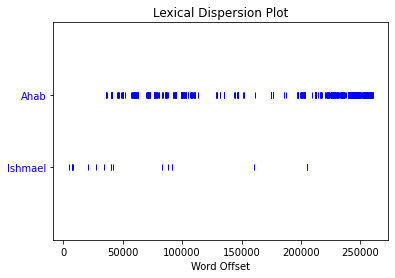

In [5]:
text1.dispersion_plot(['Ahab', 'Ishmael'])

Можно построить график распределения слов по тексту (без NumPy и matplotlib график не работает, поэтому установите эти две библиотеки, если еще не). 

In [6]:
text1.count('Moby')

84

Можно посчитать количество вхождений какого-то слова. Кстати, к текстам можно применять обычные функции len(), set() и подобные. И срезы с индексами работают!

In [7]:
text1.generate(length=100)

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . have been'

Можно сгенерировать текст, "похожий" на оригинальный. Это делается с помощью n-грамов (или n-грамм, я видела разные варианты по-русски...): nltk просто в случайном порядке совмещает эти n-грамы. Как можно видеть, не слишком полезный метод, однако можно побаловаться. 

Важнее то, что в nltk есть утилиты для работы с n-грамами:

In [8]:
from nltk.util import ngrams # bigrams

list(ngrams(sent9, 3))

[('THE', 'suburb', 'of'),
 ('suburb', 'of', 'Saffron'),
 ('of', 'Saffron', 'Park'),
 ('Saffron', 'Park', 'lay'),
 ('Park', 'lay', 'on'),
 ('lay', 'on', 'the'),
 ('on', 'the', 'sunset'),
 ('the', 'sunset', 'side'),
 ('sunset', 'side', 'of'),
 ('side', 'of', 'London'),
 ('of', 'London', ','),
 ('London', ',', 'as'),
 (',', 'as', 'red'),
 ('as', 'red', 'and'),
 ('red', 'and', 'ragged'),
 ('and', 'ragged', 'as'),
 ('ragged', 'as', 'a'),
 ('as', 'a', 'cloud'),
 ('a', 'cloud', 'of'),
 ('cloud', 'of', 'sunset'),
 ('of', 'sunset', '.')]

Функция ngrams (или bigrams) возвращает список всех н-грамов списка токенов, который ей дать. N-грамы еще принимают число n. 

У класса Text есть метод, который возвращает коллокации (частотные н-грамы):

In [11]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Как создать собственный объект класса Text? Достаточно токенизировать свой текст (любым токенизатором) и передать его в класс:

In [ ]:
mytext = Text(tokens)

Гораздо чаще на практике, однако, используются какие-то отдельные инструменты NLTK, предназначенные для обработки текста. Часть мы уже знаем: это токенизаторы и сентенайзер. 

Следующий шаг при обработке текстов - это обычно приведение слов к словарной форме. Это уже не такая простая задача, с помощью регулярок ее не решить, приходится использовать либо словари, либо более сложные методы (нейронные сети...)

Еще в прошлом веке, правда, придумали (конечно же, для английского языка) более простой способ хоть как-то унифицировать разные словоформы одного слова: стемминг. 

Стемминг – это уже чисто историческое, можно сказать, явление: в 1980-х, когда еще не было даже графического интерфейса у компьютеров и тем более средств автоматического морфоразбора, Мартин Портер разработал свой алгоритм стемминга: усечение окончания от псевдоосновы. Этот алгоритм так и называется "стеммер Портера" и доступен в версиях для нескольких европейских языков, в т.ч. для русского (Snowball – чуть более новая версия). Алгоритм с помощью правил отсекает окончания и суффиксы, основываясь на особенностях языка. Как все правиловое, работает не без ошибок.

В NLTK есть несколько стеммеров, а именно:

1. PorterStemmer
2. SnowballStemmer
3. LancasterStemmer
4. RegexpStemmer
5. RSLPStemmer

Все смотреть не будем, можете сами поискать, если интересно, нам хватит двух. 

In [1]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
example_words = ["python", "pythoner", "pythoning", "pythoned", "pythonly"]
for w in example_words:
 print(ps.stem(w))

python
python
python
python
pythonli


In [2]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('russian')  # экземпляр класса 
example = ['Пердикка', 'не', 'менее', 'десяти', 'раз', 'заключал', 'и', 'расторгал', 'союзы', 'с', 'основными', 'участниками', 'войны', '.']
for token in example:
    print(stemmer.stem(token))  # stem() - метод класса

пердикк
не
мен
десят
раз
заключа
и
расторга
союз
с
основн
участник
войн
.


Другой, более крутой способ унифицировать словоформы - все-таки приводить их к словарной форме. В NLTK есть WordNetLemmatizer, который ищет нужные леммы в словаре. Работает только для английского. 

In [3]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('playing', pos="v")) 
print(lemmatizer.lemmatize('playing', pos="n")) 
print(lemmatizer.lemmatize('playing', pos="a")) 
print(lemmatizer.lemmatize('playing', pos="r"))
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

increase
play
play
playing
playing
playing
cat
cactus
goose
rock
python
good
best
run
run


При обработке текстов для решения задач NLP, особенно если используются классические алгоритмы машинного обучения (современные нейронки извлекают признаки из всего, им часто лучше, чтобы текст сохранялся в исходном виде), бывает нужно выкинуть слишком распространенные и малозначимые слова: союзы, предлоги и т.п. В NLTK есть списки таких слов для разных языков:

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = 'При обработке текстов для решения задач NLP, особенно если используются классические алгоритмы машинного обучения (современные нейронки извлекают признаки из всего, им часто лучше, чтобы текст сохранялся в исходном виде), бывает нужно выкинуть слишком распространенные и малозначимые слова: союзы, предлоги и т.п. В NLTK есть списки таких слов для разных языков'
stop_words = set(stopwords.words('russian'))
print('Стоп-слова:', stop_words)
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(filtered_sentence)

Стоп-слова: {'зачем', 'бы', 'сам', 'другой', 'есть', 'была', 'много', 'под', 'чуть', 'да', 'при', 'между', 'всегда', 'же', 'сейчас', 'ним', 'тем', 'а', 'по', 'ну', 'эти', 'с', 'было', 'от', 'ей', 'будто', 'один', 'тебя', 'этом', 'какая', 'и', 'через', 'чтоб', 'три', 'вдруг', 'к', 'тот', 'совсем', 'был', 'разве', 'него', 'для', 'хорошо', 'они', 'вас', 'том', 'потому', 'над', 'нельзя', 'быть', 'этот', 'со', 'себе', 'опять', 'всего', 'мне', 'какой', 'ее', 'ничего', 'перед', 'где', 'на', 'когда', 'более', 'меня', 'без', 'о', 'кто', 'мы', 'нас', 'может', 'куда', 'ему', 'эту', 'моя', 'что', 'за', 'лучше', 'чтобы', 'можно', 'им', 'ж', 'во', 'его', 'того', 'этой', 'конечно', 'такой', 'чего', 'них', 'наконец', 'в', 'уж', 'здесь', 'иногда', 'ней', 'вы', 'два', 'еще', 'там', 'после', 'нибудь', 'не', 'из', 'нет', 'ли', 'если', 'никогда', 'этого', 'больше', 'были', 'теперь', 'про', 'до', 'почти', 'раз', 'я', 'так', 'но', 'ни', 'тогда', 'или', 'себя', 'все', 'мой', 'она', 'ведь', 'вот', 'только', 'х

Наконец к морфологии. Подробнее о ней мы поговорим в следующие разы, потому что морфологический разбор (с частями речи и еще и грамматическими характеристиками) - еще более сложная задача. В NLTK реализованы простейшие статистические парсеры, которые можно самостоятельно обучать на данных размеченных корпусов NLTK.

In [10]:
import nltk

text = word_tokenize("And now for something completely different")
print(nltk.pos_tag(text))
nltk.help.upenn_tagset('NN')

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [14]:
from nltk.corpus import brown # Брауновский корпус

brown_tagged_sents = brown.tagged_sents(categories='news') # возьмем все размеченные предложения из новостей
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents) # натренируем таггер на размеченных предложениях (он просто посчитает статистику)
unigram_tagger.tag(word_tokenize('I want to analyze sentences with NLTK')) # попробуем на предложении, которого он не видел

[('I', 'PPSS'),
 ('want', 'VB'),
 ('to', 'TO'),
 ('analyze', None),
 ('sentences', 'NNS'),
 ('with', 'IN'),
 ('NLTK', None)]

In [15]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.tag(word_tokenize('I want to analyze sentences with NLTK'))

[('I', 'PPSS'),
 ('want', 'VB'),
 ('to', 'TO'),
 ('analyze', None),
 ('sentences', None),
 ('with', None),
 ('NLTK', None)]

Bigram tagger работает как будто бы хуже, чем unigram, но в теории он может лучше справляться с омонимией (потому что учитывает рядом стоящее слово, и тогда beautiful book vs book something не разберет одинаково). 

Также NLTK умеет работать с данными базы [WordNet](https://wordnet.princeton.edu/). Оттуда он автоматически может извлекать сведения о семантических отношениях между словами, а также на данных WordNet у него реализован алгоритм Леска для решения задачи Word Sense Disambiguation. 

Это очень известная задача в NLP-мире, можно про нее подробнее посмотреть на [nlpprogress](http://nlpprogress.com/english/word_sense_disambiguation.html). Для ее решения мы должны неоднозначным словам в контекстах сопоставить дефиниции из словаря (в роли какового для английского языка успешно выступает WordNet). Алгоритм Леска был придуман в 1986 году и считается классическим подходом (бейзлайн, ага) для решения этой задачи. Мы предполагаем, что слова в заданном окне контекста (среди окружающих их слов) будут иметь похожую тематику. Это еще называется **дистрибутивная гипотеза** ("Лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения.", придумали это лингвисты уже много лет назад). По алгоритму Леска, определение в словаре для целевого слова сравнивается со словами, которые стоят вокруг него в контексте. 

В базовой имплементации алгоритм Леска делает следующее:

- считает количество слов, стоящих рядом с искомым словом и оказавшихся в словарном определении слова (для каждого варианта определения)
- Каких слов больше всего оказалось, то и значение. 

Очень просто!

In [16]:
from nltk.wsd import lesk 
from nltk.tokenize import word_tokenize 

def get_semantic(seq, key_word):
    temp = word_tokenize(seq)
    temp = lesk(temp, key_word)
    return temp.definition() 

In [17]:
print(get_semantic('The table was already booked by someone else', 'book'))
print(get_semantic('I love reading books on programming', 'book'))

arrange for and reserve (something for someone else) in advance
a number of sheets (ticket or stamps etc.) bound together on one edge


Ну и синонимы с антонимами просто собираются напрямую из WordNet:

In [18]:
from nltk.corpus import wordnet
synonyms = []
for syns in wordnet.synsets('dog'):
 synonyms.append(syns.name())
print ("synonyms", synonyms)

antonyms = []
for syn in wordnet.synsets("good"):
 for l in syn.lemmas():
  if l.antonyms():
   antonyms.append(l.antonyms()[0].name())
print(antonyms)

synonyms ['dog.n.01', 'frump.n.01', 'dog.n.03', 'cad.n.01', 'frank.n.02', 'pawl.n.01', 'andiron.n.01', 'chase.v.01']
['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


#### SpaCy, corpy, UDPipe

```pip install spacy```

Спейси - современная библиотека, которая написана в Cython и использует нейронные сети. Интерфейс спейси довольно удобный и однообразный. Центральное понятие для спейси - это pipeline: то есть, набор действий, которые спейси совершает с текстом. 

Чтобы обработать текст на любом из языков, представленных в библиотеке ([список](https://spacy.io/usage/models)), достаточно завести пустой пайплайн:

In [1]:
import spacy

nlp = spacy.blank('en')
doc = nlp('My beautiful sentence is here.')

Предупреждения может выдавать библиотека tensorflow, которая сообщает, что у вас не настроена CUDA, но их можно игнорировать, как и предлагается. 

Пустой пайплайн превращает наш текст в особый объект, в котором текст разделен на токены, и можно у этих токенов смотреть самые простые характеристики:

In [2]:
for token in doc:
    print(f'№ {token.i}. Токен: {token.text:>15}. Является словом: {token.is_alpha}. Является пунктуацией: {token.is_punct}. Похож на число: {token.like_num}')

№ 0. Токен:              My. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 1. Токен:       beautiful. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 2. Токен:        sentence. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 3. Токен:              is. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 4. Токен:            here. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 5. Токен:               .. Является словом: False. Является пунктуацией: True. Похож на число: False


Объект doc также позволяет смотреть спаны (несколько токенов, срез текста):

In [3]:
span = doc[1:3]
span.text

'beautiful sentence'

Ну, это все прекрасно, но хотелось бы чего-то большего. Для spacy есть довольно много предобученных моделей для разных языков (список см. выше). Модельки нужно устанавливать (скачивать) с помощью команды в командной строке - она написана у них на сайте (python -m spacy download имя_модели). Когда вы загрузили модельку, вы можете ее использовать в коде:

In [4]:
nlp = spacy.load('en_core_web_lg')

Теперь уже можно получить сведения поинтереснее:

In [5]:
doc = nlp('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')

In [14]:
for token in doc:
    print(f'{token.i:2}. {token.text:15} POS: {token.pos_:6} SyntR: {token.dep_:9} Head: {token.head.text}')

 0. The             POS: DET    SyntR: det       Head: Army
 1. 4th             POS: ADJ    SyntR: amod      Head: Army
 2. Army            POS: PROPN  SyntR: nsubj     Head: was
 3. was             POS: AUX    SyntR: ROOT      Head: was
 4. a               POS: DET    SyntR: det       Head: formation
 5. Royal           POS: PROPN  SyntR: compound  Head: Army
 6. Yugoslav        POS: ADJ    SyntR: amod      Head: Army
 7. Army            POS: PROPN  SyntR: compound  Head: formation
 8. formation       POS: NOUN   SyntR: attr      Head: was
 9. mobilised       POS: VERB   SyntR: acl       Head: formation
10. prior           POS: ADV    SyntR: advmod    Head: mobilised
11. to              POS: ADP    SyntR: prep      Head: prior
12. the             POS: DET    SyntR: det       Head: invasion
13. German          POS: PROPN  SyntR: npadvmod  Head: led
14. -               POS: PUNCT  SyntR: punct     Head: led
15. led             POS: VERB   SyntR: amod      Head: invasion
16. invasion    

Грамматические характеристики можно тоже посмотреть:

In [15]:
for token in doc[:3]:
    print(token.morph)

Definite=Def|PronType=Art
Degree=Pos
Number=Sing


Также spacy позволяет разметить именованные сущности и посмотреть, что получилось:

In [7]:
for ent in doc.ents:
    print(f'Entity: {ent.text:30} Label: {ent.label_}')

Entity: The 4th Army                   Label: ORG
Entity: Royal Yugoslav Army            Label: ORG
Entity: German                         Label: NORP
Entity: the Kingdom of Yugoslavia      Label: GPE
Entity: World War II                   Label: EVENT


Если аббревиатуры вас смущают, spacy легко предоставит расшифровки (для всех!):

In [33]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [34]:
spacy.explain('pobj')

'object of preposition'

Итак, а теперь самое интересное - это обертки для spacy + udpipe. UD, как известно - очень известный и влиятельный проект (чешский), цель которого - унифицировать тагсет для всех языков мира, причем как в морфологии, так и в синтаксисе. Неудивительно, что, поскольку в UD существует большое количество размеченных датасетов (русским языком активно занималась О. Ляшевская), то они обучили и свой парсер. Сам парсер написан в плюсах и не очень дружелюбен, но обертки для spacy делают жизнь проще. 

Внимание: я обычно это забываю, но прежде чем установить udpipe, **нужно поставить C++ Build Tools** (с сайта майкрософт, это бесплатно). Это нужно, чтобы скомпилировать udpipe из исходников в сях. Адрес сайта, откуда брать их, сам pip обычно подсказывает, но в целом можно просто погуглить. 

Две оболочки для udpipe, которые мы посмотрели - это spacy_udpipe и corpy. Обе нужно устанавливать:

    pip install spacy_udpipe
    pip install corpy
    
Для spacy_udpipe вообще ничего больше не нужно, там максимально автоматизированно скачиваются модельки. Для corpy приходится скачивать искомую модель руками, [отсюда](https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-3131). Эту модель вы можете положить куда угодно, главное потом указать corpy путь к ней. 

In [35]:
import spacy_udpipe

spacy_udpipe.download('en')  # эту команду достаточно выполнить только один раз - она как nltk.download()

Already downloaded a model for the 'en' language


In [37]:
nlp = spacy_udpipe.load('en')
doc = nlp('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')
for token in doc:
    print(f'{token.i:2}. {token.text:15} Lemma: {token.lemma_:15} POS: {token.pos_:6} SyntR: {token.dep_:9} Head: {token.head.text}')

 0. The             Lemma: the             POS: DET    SyntR: det       Head: Army
 1. 4th             Lemma: 4th             POS: ADJ    SyntR: amod      Head: Army
 2. Army            Lemma: Army            POS: PROPN  SyntR: nsubj     Head: formation
 3. was             Lemma: be              POS: AUX    SyntR: cop       Head: formation
 4. a               Lemma: a               POS: DET    SyntR: det       Head: formation
 5. Royal           Lemma: Royal           POS: PROPN  SyntR: compound  Head: Army
 6. Yugoslav        Lemma: Yugoslav        POS: PROPN  SyntR: compound  Head: Army
 7. Army            Lemma: Army            POS: PROPN  SyntR: compound  Head: formation
 8. formation       Lemma: formation       POS: NOUN   SyntR: nsubj     Head: mobilised
 9. mobilised       Lemma: mobilise        POS: VERB   SyntR: ROOT      Head: mobilised
10. prior           Lemma: prior           POS: ADJ    SyntR: case      Head: invasion
11. to              Lemma: to              POS: ADP  

То же самое можно сделать в corpy:

In [38]:
from corpy.udpipe import Model

model = Model('english-partut-ud-2.5-191206.udpipe')  
# тут и нужно указать путь к вашей модели. Если она лежит в той же папке, что и скрипт, достаточно только имени файла

sents = model.process('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')

corpy возвращает генератор (то есть, итерируемый объект, который как магазин автомата, расстреляли все патроны - он опустел; повторно по генератору итерироваться нельзя). Генератор на каждом шаге выдает предложение (объект специального класса Sentence()), а в предложении - объекты класса Word(). 

In [40]:
for sent in sents:
    for word in sent.words:
        print(f'{word.form:15} Лемма: {word.lemma:15} POS: {word.upostag} Грам. инфа: {word.feats}')
print('Алилуя!')

<root>          Лемма: <root>          POS: <root> Грам. инфа: <root>
The             Лемма: the             POS: DET Грам. инфа: Definite=Def|PronType=Art
4th             Лемма: 4th             POS: ADJ Грам. инфа: Degree=Pos
Army            Лемма: army            POS: NOUN Грам. инфа: Number=Sing
was             Лемма: be              POS: AUX Грам. инфа: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
a               Лемма: a               POS: DET Грам. инфа: Definite=Ind|Number=Sing|PronType=Art
Royal           Лемма: royal           POS: PROPN Грам. инфа: 
Yugoslav        Лемма: Yugoslav        POS: PROPN Грам. инфа: 
Army            Лемма: army            POS: PROPN Грам. инфа: 
formation       Лемма: formation       POS: NOUN Грам. инфа: Number=Sing
mobilised       Лемма: mobilize        POS: VERB Грам. инфа: Mood=Ind|Person=3|Tense=Past|VerbForm=Fin
prior           Лемма: prior           POS: ADJ Грам. инфа: Degree=Pos
to              Лемма: to              POS: ADP Грам

у corpy, кстати, есть свой способ вывода имеющейся информации (хотя, по-моему, в юпитере и так красиво выводится...)

In [43]:
from corpy.udpipe import pprint

pprint(list(model.process('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')))

[Sentence(
   comments=[
     '# newdoc',
     '# newpar',
     '# sent_id = 1',
     '# text = The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.'],
   words=[
     Word(id=0, <root>),
     Word(id=1,
          form='The',
          lemma='the',
          xpostag='RD',
          upostag='DET',
          feats='Definite=Def|PronType=Art',
          head=3,
          deprel='det'),
     Word(id=2,
          form='4th',
          lemma='4th',
          xpostag='A',
          upostag='ADJ',
          feats='Degree=Pos',
          head=3,
          deprel='amod'),
     Word(id=3,
          form='Army',
          lemma='army',
          xpostag='S',
          upostag='NOUN',
          feats='Number=Sing',
          head=9,
          deprel='nsubj'),
     Word(id=4,
          form='was',
          lemma='be',
          xpostag='V',
          upostag='AUX',
          feats='Mood=Ind|Number=Sing|Person=3

#### Stanza

In [ ]:
!pip install stanza

Загрузка моделей

In [9]:
import stanza

In [ ]:
nlp_ru = stanza.Pipeline(lang='ru')
nlp_en = stanza.Pipeline(lang='en', processors='tokenize, pos, constituency')
nlp_fr = stanza.Pipeline(lang='fr', processors='tokenize, mwt')

Токенизация, сегментация по предложениям

In [21]:
text = '''Архитектура Византии — совокупность традиций строительства и архитектуры в поздней Римской империи и в Византии в период с начала IV века по середину XV века. В качестве отдельных направлений исследования выделяют религиозную архитектуру Византии, византийскую фортификацию и гражданское строительство, включающее дворцы, общественные сооружения и частные дома. Также в рамках данной дисциплины изучают традиции строительного ремесла и декоративного искусства.'''

doc = nlp_ru(text)

In [17]:
print(*[sentence.text for sentence in doc.sentences], sep='\n')

Архитектура Византии — совокупность традиций строительства и архитектуры в поздней Римской империи и в Византии в период с начала IV века по середину XV века.
В качестве отдельных направлений исследования выделяют религиозную архитектуру Византии, византийскую фортификацию и гражданское строительство, включающее дворцы, общественные сооружения и частные дома.
Также в рамках данной дисциплины изучают традиции строительного ремесла и декоративного искусства.


In [ ]:
for i, sentence in enumerate(doc.sentences):
  print(f'====== Sentence {i + 1} tokens =======')
  print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

In [ ]:
text_fr = '''Il est révélé par les romans Extension du domaine de la lutte (1994) et, surtout, Les Particules élémentaires (1998), qui le fait connaître d'un large public.'''

doc_fr = nlp_fr(text_fr)
for token in doc_fr.sentences[0].tokens:
    print(f'token: {token.text}\twords: {", ".join([word.text for word in token.words])}')

Лемматизация

In [ ]:
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

Морфопарсинг

In [ ]:
print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in doc.sentences for word in sent.words], sep='\n')

Парсинг синтаксических зависимостей

In [ ]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

In [ ]:
doc.sentences[0].print_dependencies()

Парсинг составляющих (для русского недоступен)

In [ ]:
doc_en = nlp_en('This is a sentence for parsing constituencies.')

for sentence in doc_en.sentences:
    print(sentence.constituency)

#### natasha

Библиотека natasha - это библиотека только для русского языка. Она очень быстрая и модульная, так что можно устанавливать только какие-то отдельные вещи из нее, например, у нее есть отдельный подмодуль razdel с токенизатором и сентенайзером:

In [1]:
!pip install razdel

from razdel import sentenize, tokenize

raw = '''Раньше библиотека Natasha решала задачу NER для русского языка, была построена на правилах, показывала среднее качество и производительность. Сейчас Natasha — это целый большой проект, состоит из 9 репозиториев. Библиотека Natasha объединяет их под одним интерфейсом, решает базовые задачи обработки естественного русского языка: сегментация на токены и предложения, предобученные эмбеддинги, анализ морфологии и синтаксиса, лемматизация, NER. Все решения показывают топовые результаты в новостной тематике, быстро работают на CPU.'''
sents = [sent.text for sent in sentenize(raw)]
for i in range(len(sents)):
    sents[i] = [token.text for token in tokenize(sents[i])]
for sent in sents:
    print(sent)

['Раньше', 'библиотека', 'Natasha', 'решала', 'задачу', 'NER', 'для', 'русского', 'языка', ',', 'была', 'построена', 'на', 'правилах', ',', 'показывала', 'среднее', 'качество', 'и', 'производительность', '.']
['Сейчас', 'Natasha', '—', 'это', 'целый', 'большой', 'проект', ',', 'состоит', 'из', '9', 'репозиториев', '.']
['Библиотека', 'Natasha', 'объединяет', 'их', 'под', 'одним', 'интерфейсом', ',', 'решает', 'базовые', 'задачи', 'обработки', 'естественного', 'русского', 'языка', ':', 'сегментация', 'на', 'токены', 'и', 'предложения', ',', 'предобученные', 'эмбеддинги', ',', 'анализ', 'морфологии', 'и', 'синтаксиса', ',', 'лемматизация', ',', 'NER', '.']
['Все', 'решения', 'показывают', 'топовые', 'результаты', 'в', 'новостной', 'тематике', ',', 'быстро', 'работают', 'на', 'CPU', '.']


In [ ]:
!pip install natasha

Морфосинтаксический парсинг

In [2]:
from natasha import (
    Segmenter,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    
    Doc
)

In [ ]:
segmenter = Segmenter()  # токенизация и разделение на предложения
emb = NewsEmbedding()  # эмбеддинги
morph_tagger = NewsMorphTagger(emb)  # морфология
syntax_parser = NewsSyntaxParser(emb) # синтаксис

text = '29 марта 2017 года правительство Великобритании инициировало процедуру выхода в соответствии со статьёй 50 Договора о Европейском союзе; первоначально планировалось, что Великобритания покинет Европейский союз через два года, 29 марта 2019 года в 23:00 по Гринвичу.'
doc = Doc(text)

doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()
sent.syntax.print()

Распознание именованных сущностей

In [ ]:
from natasha import NewsNERTagger

ner_tagger = NewsNERTagger(emb)
doc.tag_ner(ner_tagger)
doc.ner.print()

Лемматизация

In [ ]:
from natasha import MorphVocab

morph_vocab = MorphVocab()

for token in doc.tokens:
  token.lemmatize(morph_vocab)
  print(token.lemma)

Нормализация именованных сущностей

In [ ]:
for span in doc.spans:
    span.normalize(morph_vocab)
   
{_.text: _.normal for _ in doc.spans}

### Морфопарсеры для русского языка

Некоторые инструменты существуют сами по себе, без большой общей библиотеки; для русского языка существует очень популярный правиловый морфопарсер pymorphy2, который можно использовать для быстрой (и не слишком качественной) лемматизации, например, когда важнее скорость, чем качество. Также есть морфопарсер rnnmorph на нейронной сети. 

Pymorphy устанавливается так:

```
pip install pymorphy2
pip install -U pymorphy2-dicts-ru  # необязательно: для обновления словаря
```

In [5]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

parse = morph.parse('студентки')
parse

[Parse(word='студентки', tag=OpencorporaTag('NOUN,anim,femn sing,gent'), normal_form='студентка', score=0.6, methods_stack=((DictionaryAnalyzer(), 'студентки', 40, 1),)),
 Parse(word='студентки', tag=OpencorporaTag('NOUN,anim,femn plur,nomn'), normal_form='студентка', score=0.4, methods_stack=((DictionaryAnalyzer(), 'студентки', 40, 7),))]

У класса MorphAnalyzer() есть метод parse, который возвращает что? Список экземпляров класса Parse. У этого класса есть свои атрибуты: word (исходная форма слова), tag (грам. инфа), normal_form (лемма), score(предпосчитанная на OpenCorpora вероятность правильности разбора) и несколько технических. 

Соответственно, получить информацию можно, просто обращаясь к атрибутам (не забудьте, что у нас всегда список, поэтому нужно еще и индекс разбора указывать):

In [6]:
print(parse[0].word)
print(parse[0].tag)
print(parse[0].normal_form)

студентки
NOUN,anim,femn sing,gent
студентка


Атрибут tag &ndash; это экземпляр класса OpencorporaTag, как можно догадаться. У него есть еще свои атрибуты, к которым тоже можно обращаться, чтобы получать более конкретную информацию о слове. 

In [10]:
parse = morph.parse('участник')

t = parse[0].tag  # я записала в переменную, просто чтобы не копировать каждый раз все целиком
# но это то же самое, что parse[0].tag.animacy...
print(f'Часть речи: {t.POS}')
print(f'Одушевленность: {t.animacy}\nПадеж: {t.case}\nРод: {t.gender}\nНаклонение: {t.mood}\
\nЧисло: {t.number}\nЛицо: {t.person}\nВремя: {t.tense}\nПереходность: {t.transitivity}\nЗалог: {t.voice}')

Часть речи: NOUN
Одушевленность: anim
Падеж: nomn
Род: masc
Наклонение: None
Число: sing
Лицо: None
Время: None
Переходность: None
Залог: None


In [8]:
parse = morph.parse('говорит')

t = parse[0].tag  
print(f'Часть речи: {t.POS}')
print(f'Одушевленность: {t.animacy}\nПадеж: {t.case}\nРод: {t.gender}\n\
Наклонение: {t.mood}\nЧисло: {t.number}\nЛицо: {t.person}\nВремя: {t.tense}\nПереходность: {t.transitivity}\nЗалог: {t.voice}')

Часть речи: VERB
Одушевленность: None
Падеж: None
Род: None
Наклонение: indc
Число: sing
Лицо: 3per
Время: pres
Переходность: tran
Залог: None


Если вы запрашиваете категорию, которой у данного слова нет (ну нет переходности у существительного), вернется None. 

Также можно попросить pymorphy поставить слово в конкретную форму или вообще вернуть всю парадигму. 

In [9]:
parse[0].inflect({'plur'})

Parse(word='говорят', tag=OpencorporaTag('VERB,impf,tran plur,3per,pres,indc'), normal_form='говорить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'говорят', 415, 6),))

In [11]:
parse[0].lexeme  
# парадигму глагола лучше не выводить - она длинная; я перед запуском этой ячейки перезапустила разбор с существительным, поэтому не удивляйтесь. :)

[Parse(word='участник', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участник', 2, 0),)),
 Parse(word='участника', tag=OpencorporaTag('NOUN,anim,masc sing,gent'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участника', 2, 1),)),
 Parse(word='участнику', tag=OpencorporaTag('NOUN,anim,masc sing,datv'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участнику', 2, 2),)),
 Parse(word='участника', tag=OpencorporaTag('NOUN,anim,masc sing,accs'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участника', 2, 3),)),
 Parse(word='участником', tag=OpencorporaTag('NOUN,anim,masc sing,ablt'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участником', 2, 4),)),
 Parse(word='участнике', tag=OpencorporaTag('NOUN,anim,masc sing,loct'), normal_form='участник', score=1.0, methods_stack=((DictionaryAnalyzer(), 'участник

Наконец, можно попросить pymorphy выводить грам. информацию по-русски:

In [12]:
parse[0].tag.cyr_repr

'СУЩ,од,мр ед,им'

Pymorphy очень быстро работает и имеет много возможностей, но совершенно не умеет разрешать омонимию и никак не учитывает контекст.

rnnmorph - инструмент покруче (в 2017 году его автор выиграл соревнование по морфопарсингу русского языка). 

Устанавливается просто:

```pip install rnnmorph```

Правда, может козлить во время установки. Иногда, если плохо установился и не работает, приходится его удалять командой pip uninstall rnnmorph (обязательно в консоли от имени администратора!). Периодически, если обновляется версия tensorflow, может перестать работать &ndash; но Илья Гусев обычно вскоре обновляет и свой парсер, так что достаточно следить за новостями в [его гитхабе](https://github.com/IlyaGusev/rnnmorph) &ndash; или просто подождать светлых времен.

In [21]:
from rnnmorph.predictor import RNNMorphPredictor

predictor = RNNMorphPredictor(language='ru')
parse = predictor.predict(['Пердикка', 'не', 'менее', 'десяти', 'раз', 'заключал', 'и', 'расторгал', 'союзы', 'с', 'основными', 'участниками', 'войны', '.'])
parse[:5]

2022-04-06 12:00:12.010260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 12:00:12.010289: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-06 12:00:13.910063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-06 12:00:13.910109: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-06 12:00:13.910134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aslin): /proc/driver/nvidia/version does not exist
2022-04-06 12:00:13.910346: I tensorflow/core/platform/cpu_feature_guar

[<normal_form=пердикк; word=Пердикка; pos=NOUN; tag=Case=Acc|Gender=Masc|Number=Sing; score=0.7922>,
 <normal_form=не; word=не; pos=PART; tag=_; score=1.0000>,
 <normal_form=менее; word=менее; pos=ADV; tag=Degree=Cmp; score=1.0000>,
 <normal_form=десять; word=десяти; pos=NUM; tag=Case=Gen; score=1.0000>,
 <normal_form=раз; word=раз; pos=NOUN; tag=Case=Gen|Gender=Masc|Number=Plur; score=0.9998>]

rnnmorph принимает список строк (токенов) и возвращает список объектов специального класса, у которого есть атрибуты normal_form (лемма), word (исходная форма), pos (часть речи), tag (грам. информация) и score (уверенность нейронной модели в правильности своего ответа). Он умеет снимать омонимию (лучше, чем майстем, но хуже, чем интегральный морфопарсер). 

In [22]:
parse[-2].pos  # например, можно узнать часть речи для предпоследнего слова в списке

'NOUN'

### Просмотр разметки

В дальнейшем нам с вами часто придется работать с форматом conllu, в котором хранится разметка UD, например. Для чтения файлов в этом формате существуют готовые библиотеки: conllu и pyconll. 

Например, как пользоваться последней:

```pip install pyconll```

In [ ]:
import pyconll

text = pyconll.load_from_file('myfile.conllu')

for sentence in text:
    for token in sentence:
        print(token.id, token.form, token.lemma, token.upos, token.feats, token.head, token.deprel)

Естественно, можно не только печатать информацию, но и добавлять в список и вообще делать все, что угодно. Что это за атрибуты у токенов?

- id - порядковый номер токена в предложении
- form - исходная форма
- lemma - лемма
- upos - часть речи в UD
- xpos - часть речи в неуниверсальном формате (обычно встречается, если датасет конвертированный)
- feats - грам. характеристики
- head - расстояние от синтаксической вершины
- deprel - тип синтаксической связи
- две зарезервированные ячейки

Где можно красивенько отрисовать .conllu файлы в виде деревьев зависимости:

[Арборатор](https://arborator.ilpga.fr/q.cgi): достаточно вставить текст в формате .conllu. Иногда отваливается, правда. 

[Conllu-Viewer на сайте UD](https://universaldependencies.org/conllu_viewer.html): умеет читать файлы и рисовать последовательно все предложения

Для затравки вот картинка с арборатора:

<img src='https://github.com/rsuh-python/bac20-24/blob/main/6%20term%20(spring%202023)/09-Morphology/arbo.png?raw=true'>